In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans

/Users/ammaar/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [3]:
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [4]:
print(digits.target)

[0 1 2 ... 8 9 8]


### Visualizing a sample image

<Figure size 640x480 with 0 Axes>

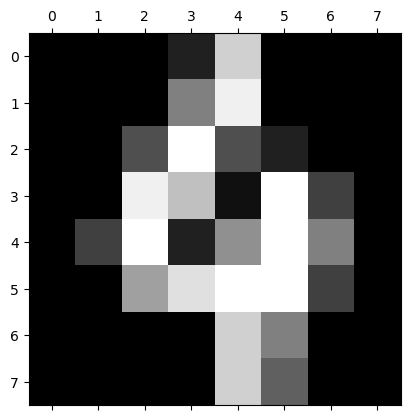

In [5]:
plt.gray()
plt.matshow(digits.images[100]) # Should be a 4
plt.show()

In [6]:
print(digits.target[100])

4


### K-Means Clustering

In [7]:
# Because there are 10 digits (0, 1, 2, 3, 4, 5, 6, 7, 8, and 9), there should be 10 clusters.
model = KMeans(n_clusters=10, random_state=40)
model.fit(digits.data)

KMeans(n_clusters=10, random_state=40)

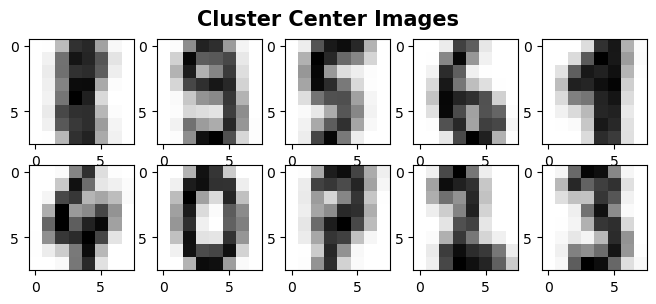

In [8]:
# Visualizing the centroids after K-Means
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Cluster Center Images', fontsize=15, fontweight='bold')

# Loop that displays each of the cluster centers:
for i in range(10): # range(n_clusters)
    
    # Initialize subplots in a grid of 2x5, i+1 th position 
    ax = fig.add_subplot(2, 5, 1+i)
    
    # Display Images
    ax.imshow(model.cluster_centers_[i].reshape((8,8)), cmap=plt.cm.binary)
    
plt.show()
    

### Testing the Model

Using a local host to input my own handwriting into the model

In [9]:
# Outputted array from my handwriting (See README.MD)
new_samples = np.array([
    [0.08,3.88,4.03,3.80,3.72,2.35,0.81,0.00,0.53,7.47,7.62,7.61,7.62,7.62,7.61,7.14,0.00,1.44,2.28,2.28,3.27,6.54,7.62,7.38,0.00,0.00,0.00,0.00,1.36,7.31,7.62,4.49,0.00,0.00,4.64,6.86,7.24,7.62,7.62,7.62,0.00,0.00,5.95,7.62,7.62,7.09,6.10,5.03,0.00,0.00,5.16,7.62,6.54,1.14,0.00,0.00,0.00,2.43,7.62,6.93,0.76,0.00,0.00,0.00],
    [0.00,3.98,5.32,4.80,4.57,4.10,3.50,2.18,0.00,6.37,5.98,6.09,6.30,7.22,7.60,7.59,0.00,0.00,0.00,0.00,0.61,6.47,7.34,3.20,0.30,3.92,6.04,7.52,7.60,7.61,6.08,2.64,0.99,6.75,6.01,7.38,7.53,5.66,6.69,5.24,0.00,0.00,3.27,7.62,4.29,0.00,0.00,0.00,0.00,0.68,7.16,5.77,0.07,0.00,0.00,0.00,0.00,4.11,7.46,1.41,0.00,0.00,0.00,0.00],
    [0.74,1.52,1.59,2.74,3.03,2.27,0.07,0.00,4.87,7.62,7.62,7.23,6.24,7.62,6.62,2.78,0.00,0.38,0.38,0.00,0.68,5.94,7.37,2.86,0.13,2.51,3.04,3.11,6.59,7.28,2.25,0.00,1.06,6.83,7.61,7.62,7.62,7.62,7.62,4.83,0.00,2.79,7.53,2.72,0.00,0.38,1.90,1.37,0.23,6.73,4.66,0.00,0.00,0.00,0.00,0.00,0.31,5.10,0.82,0.00,0.00,0.00,0.00,0.00],
    [0.00,3.70,4.56,4.57,5.33,4.87,4.25,1.29,0.00,3.70,4.56,4.57,4.48,6.07,7.62,3.32,0.00,0.00,0.00,0.00,0.74,7.14,4.94,0.00,0.00,2.03,6.69,7.52,7.44,7.61,4.34,1.67,0.00,0.81,2.88,4.49,7.58,4.69,5.71,3.73,0.00,0.00,0.51,6.83,5.06,0.00,0.00,0.00,0.00,0.00,4.96,6.90,0.53,0.00,0.00,0.00,0.00,0.00,6.46,2.41,0.00,0.00,0.00,0.00]
])

new_labels = model.predict(new_samples)

AttributeError: 'NoneType' object has no attribute 'split'

In [ ]:
new_labels = model.predict(new_samples)
print(new_samples)
# print(new_labels)
# for i in range(len(new_labels)):
#     if new_labels[i] == 0:
#         print(0, end='')
#     elif new_labels[i] == 1:
#         print(9, end='')
#     elif new_labels[i] == 2:
#         print(2, end='')
#     elif new_labels[i] == 3:
#         print(1, end='')
#     elif new_labels[i] == 4:
#         print(6, end='')
#     elif new_labels[i] == 5:
#         print(8, end='')
#     elif new_labels[i] == 6:
#         print(4, end='')
#     elif new_labels[i] == 7:
#         print(5, end='')
#     elif new_labels[i] == 8:
#         print(7, end='')
#     elif new_labels[i] == 9:
#         print(3, end='')
